# Лабораторная работа 4

Деревья решений

Выполнил: Новицкий Никита (6132-010402D)

1 Выберите набор данных для классификации (бинарной или многоклассовой — не важно). Опишите данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

Набор данных: https://www.kaggle.com/datasets/pritsheta/diabetes-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score

from warnings import filterwarnings
filterwarnings("ignore")

Считываем набор данных

In [2]:
df = pd.read_excel("diabetes.xlsx")

In [3]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,85,66,29,0,26.6,0.351,31,No
2,8,183,64,0,0,23.3,0.672,32,Yes
3,1,89,66,23,94,28.1,0.167,21,No
4,0,137,40,35,168,43.1,2.288,33,Yes


Это набор данных по диабету. вы можете использовать этот набор данных для прогнозирования. в этом наборе данных есть много параметров, таких как Беременность, Уровень глюкозы, кровяное давление, Состояние кожи, инсулин, ИМТ, родословная диабета, Возраст, Результат.

Размерность данных

In [4]:
df.shape

(768, 9)

Посмотрим информацию по датасету

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


Видим, что пропущенных значений нет

Визуализируем колонку Age, интересно посмотреть, какое распределение по возрасту в данном наборе данных

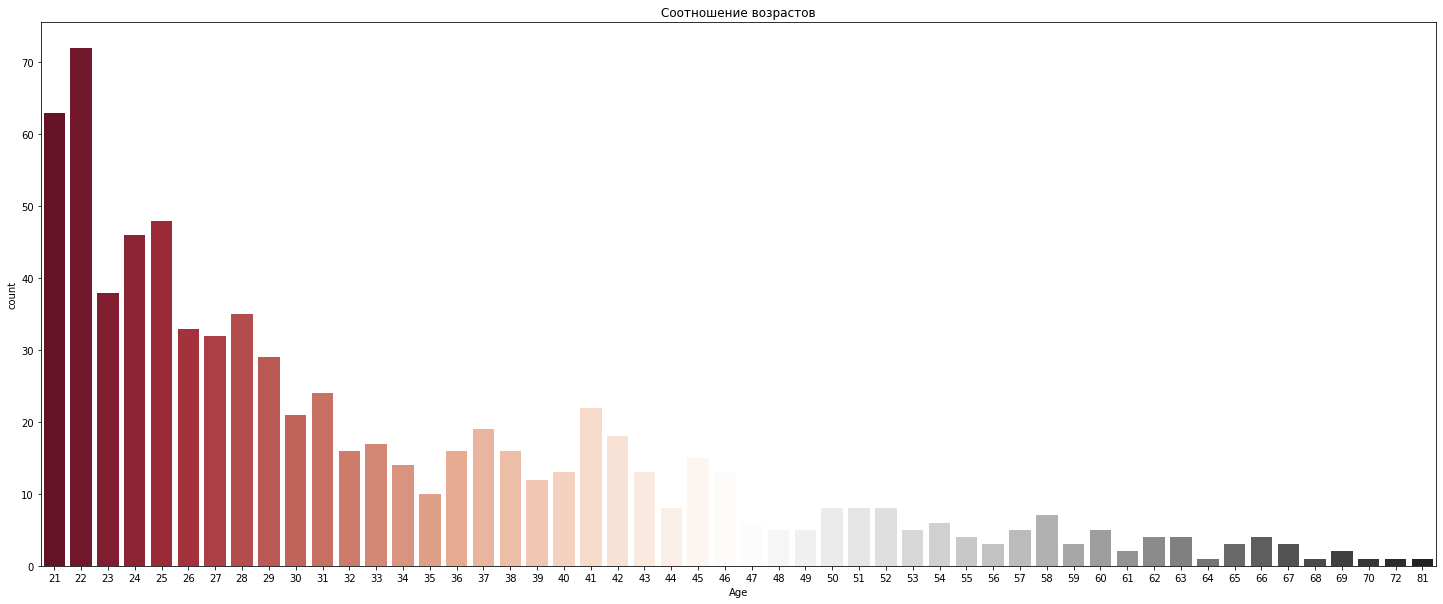

In [6]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.countplot(df["Age"], palette="RdGy")
ax.set(title="Соотношение возрастов")
plt.show()

Видим, что большая часть людей - это молодые люди в возрасте 21-22 года

Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies

In [7]:
codes, uniques = pd.factorize(df["Outcome"])
df["Outcome"] = codes

In [8]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,0
1,1,85,66,29,0,26.6,0.351,31,1
2,8,183,64,0,0,23.3,0.672,32,0
3,1,89,66,23,94,28.1,0.167,21,1
4,0,137,40,35,168,43.1,2.288,33,0
5,5,116,74,0,0,25.6,0.201,30,1
6,3,78,50,32,88,31.0,0.248,26,0
7,10,115,0,0,0,35.3,0.134,29,1
8,2,197,70,45,543,30.5,0.158,53,0
9,8,125,96,0,0,0.0,0.232,54,0


In [9]:
X = df.drop("Outcome", axis=1) 
y = df["Outcome"]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=7)

1.1 С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)

In [11]:
Scaler = MinMaxScaler()
X_scaler = Scaler.fit_transform(X)

In [12]:
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_scaler, y, test_size=0.25)

In [13]:
KNeighbors = KNeighborsClassifier()
KNeighbors.fit(X_knn_train, y_knn_train)
KNeighborsPredict = KNeighbors.predict(X_test)
print(classification_report(y_test, KNeighborsPredict))
print(accuracy_score(y_test, KNeighborsPredict) * 100)

              precision    recall  f1-score   support

           0       0.35      0.98      0.52        95
           1       0.60      0.02      0.03       174

    accuracy                           0.36       269
   macro avg       0.48      0.50      0.28       269
weighted avg       0.51      0.36      0.20       269

35.687732342007436


1.2 То же самое и использованием sklearn.pipeline.Pipeline

In [14]:
KNeighborsPipe = Pipeline([('Scaler', MinMaxScaler()), ('kNN', KNeighborsClassifier())])
KNeighborsPipe.fit(X_train, y_train)
KNeighborsPredictPipe = KNeighborsPipe.predict(X_test)
print(classification_report(y_test, KNeighborsPredictPipe))
print(accuracy_score(y_test, KNeighborsPredictPipe) * 100)

              precision    recall  f1-score   support

           0       0.58      0.55      0.56        95
           1       0.76      0.78      0.77       174

    accuracy                           0.70       269
   macro avg       0.67      0.66      0.67       269
weighted avg       0.70      0.70      0.70       269

69.88847583643123


1.3 С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

In [15]:
KNeighborsParams = {'n_neighbors': range(1, 35)}
KNeighborsGCV = GridSearchCV(KNeighborsClassifier(), KNeighborsParams, scoring="roc_auc")
KNeighborsGCV.fit(X_knn_train, y_knn_train)
KNeighborsPredictGCV = KNeighborsGCV.predict(X_test)
print(classification_report(y_test, KNeighborsPredictGCV))
print(accuracy_score(y_test, KNeighborsPredictGCV) * 100)

              precision    recall  f1-score   support

           0       0.35      1.00      0.52        95
           1       0.00      0.00      0.00       174

    accuracy                           0.35       269
   macro avg       0.18      0.50      0.26       269
weighted avg       0.12      0.35      0.18       269

35.31598513011153


In [16]:
KNeighborsGCV.best_estimator_

KNeighborsClassifier(n_neighbors=33)

2.1 Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке

In [17]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTCPredict = DTC.predict(X_test)
print(classification_report(y_test, DTCPredict))
print(accuracy_score(y_test, DTCPredict) * 100)

              precision    recall  f1-score   support

           0       0.56      0.58      0.57        95
           1       0.77      0.75      0.76       174

    accuracy                           0.69       269
   macro avg       0.66      0.67      0.66       269
weighted avg       0.69      0.69      0.69       269

69.14498141263941


2.2 С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)

In [18]:
parametrs = {
    "max_depth": np.linspace(1, 32, 32, endpoint=True),
    "min_samples_split": np.linspace(0.01, 0.1, 10, endpoint=True),
    "min_samples_leaf": np.linspace(0.01, 0.1, 10, endpoint=True),
}

DTC_GCV = GridSearchCV(DecisionTreeClassifier(), parametrs)
DTC_GCV.fit(X_train, y_train)
print(DTC_GCV.best_estimator_)
DTC_GCV_Predict = DTC_GCV.predict(X_test)
print(classification_report(y_test, DTC_GCV_Predict))
print(accuracy_score(y_test, DTC_GCV_Predict) * 100)

DecisionTreeClassifier(max_depth=2.0, min_samples_leaf=0.06000000000000001,
                       min_samples_split=0.01)
              precision    recall  f1-score   support

           0       0.68      0.57      0.62        95
           1       0.78      0.85      0.82       174

    accuracy                           0.75       269
   macro avg       0.73      0.71      0.72       269
weighted avg       0.74      0.75      0.75       269

75.09293680297398


2.3 Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

   feature  importance
1  Glucose    0.645165
5      BMI    0.193728
7      Age    0.161107


<AxesSubplot:xlabel='importance', ylabel='feature'>

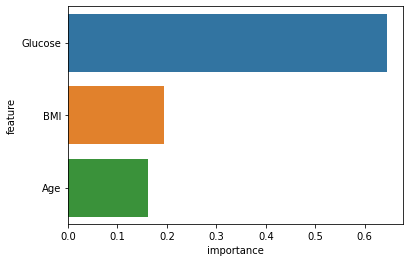

In [19]:
features_importance_df = pd.DataFrame(data={"feature": X_train.columns, 'importance': DTC_GCV.best_estimator_.feature_importances_})
print(features_importance_df.sort_values(by="importance", ascending=False).head(3))
sns.barplot(data=features_importance_df[features_importance_df['importance'] > 0], y="feature", x="importance")

3.1 Продемонстрировать работу случайного леса RandomForestClassifier

In [20]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
RF_Predict = RF.predict(X_test)
print(classification_report(y_test, RF_Predict))
print(accuracy_score(y_test, RF_Predict) * 100)

              precision    recall  f1-score   support

           0       0.66      0.63      0.65        95
           1       0.80      0.82      0.81       174

    accuracy                           0.75       269
   macro avg       0.73      0.73      0.73       269
weighted avg       0.75      0.75      0.75       269

75.46468401486989


3.2 С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики

In [21]:
parametrs = {"n_estimators": range(1, 65)}

RF_GCV = GridSearchCV(RandomForestClassifier(), parametrs)
RF_GCV.fit(X_train, y_train)
print(RF_GCV.best_estimator_)
RF_GCV_Predict = RF_GCV.predict(X_test)
print(classification_report(y_test, RF_GCV_Predict))
print(accuracy_score(y_test, RF_GCV_Predict) * 100)

RandomForestClassifier(n_estimators=44)
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        95
           1       0.81      0.83      0.82       174

    accuracy                           0.77       269
   macro avg       0.74      0.74      0.74       269
weighted avg       0.76      0.77      0.76       269

76.57992565055763


                    feature  importance
1                   Glucose    0.255752
5                       BMI    0.158248
6  DiabetesPedigreeFunction    0.136352


<AxesSubplot:xlabel='importance', ylabel='feature'>

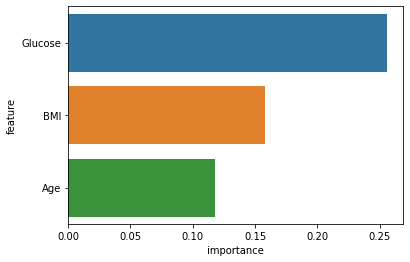

In [22]:
features_df = pd.DataFrame(data={"feature": X_train.columns, 'importance': RF_GCV.best_estimator_.feature_importances_})
print(features_df.sort_values(by="importance", ascending=False).head(3))
sns.barplot(data=features_df[features_importance_df['importance'] > 0], y="feature", x="importance")